In this notebook, we analyze the Voronoi test performance of the auxin treatment and the NPA treatment together. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.spatial import Voronoi
from statannot import add_stat_annotation

import bambi as bmb 
import arviz as az

import sys
sys.path.insert(0, '../')
import graph_create, voronoi_local, jaccard_similarity, center_predict

WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
treatments = ['24-D', '24-D_Ctrl', 'Auxin', 'NPA_50', 'NPA_100', 'NPA_Ctrl']

In [3]:
def shape_dfs(data_arr, sample_df, value_name = 'error'):
    
    mean_df = pd.DataFrame(data_arr, index = sample_df.index, columns = ['hydathode','centroid','mid-point','random'])
    mean_df['plant'] = sample_df['plant'].values.tolist()
    mean_df['sample'] = mean_df.index

    melted_mean_df = mean_df.melt(id_vars= ['sample', 'plant'] , var_name='type', value_name= value_name)
    melted_mean_df["type"]  = pd.Categorical(melted_mean_df["type"].tolist(), categories = ['hydathode','centroid','mid-point','random'], ordered=True)

    return mean_df, melted_mean_df

-----
### 1.1 Local test (Voronoi I):

In [4]:
def local_error(sample, dot_folder, vein_folder):
    G = graph_create.graph_creation(sample, dot_folder, vein_folder )

    print('Perform local tests... \n')
    # local tests:
    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)

    # baseline local tests:
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)    
    centroid_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, cent_in_faces)
    midpoint_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat ,mid_in_faces)
    random_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, rand_in_faces)

    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])

    baseline_summary = pd.DataFrame(np.array([rst[2].iloc[0].tolist(), centroid_rst[2].iloc[0].tolist(), midpoint_rst[2].iloc[0].tolist(), random_rst[2].iloc[0].tolist()]), 
                                    columns = ['angle_mean', 'angle_std', 'dist_mean', 'dist_std'],
                                    index = ['dot', 'centroid', 'midpoint','random'])

    angle_list = [baseline_summary['angle_mean'][0],
                        baseline_summary['angle_mean'][1],
                        baseline_summary['angle_mean'][2],
                        baseline_summary['angle_mean'][3]]

    dist_list = [baseline_summary['dist_mean'][0],
                        baseline_summary['dist_mean'][1],
                        baseline_summary['dist_mean'][2],
                        baseline_summary['dist_mean'][3]]

    print('Local tests done! \n')

    return angle_list, dist_list

In [5]:
def treatment_test(treatment):
    
    dot_folder = f'../data/chemical/{treatment}/Hydathodes'
    vein_folder = f'../data/chemical/{treatment}/Veins'
    sample_df = pd.read_csv(f'../data/chemical/{treatment}.csv', delimiter=',', header = None, index_col= 0)
    sample_df.columns = ['plant']
    angle_mean_arr = np.zeros([len(sample_df),4])
    dist_mean_arr = np.zeros([len(sample_df),4])

    for i, sample in enumerate(sample_df.index):
        angle_list, dist_list = local_error(sample, dot_folder, vein_folder)
        angle_mean_arr[i] = angle_list
        dist_mean_arr[i] = dist_list

    _, angle_mean_df = shape_dfs(angle_mean_arr, sample_df, value_name = 'error')
    _, dist_mean_df = shape_dfs(dist_mean_arr, sample_df, value_name = 'error')
    
    return angle_mean_df, dist_mean_df

In [7]:
angle_mean_df_24D, dist_mean_df_24D = treatment_test(treatments[0])
angle_mean_df_24D_Ctrl, dist_mean_df_24D_Ctrl = treatment_test(treatments[1])
angle_mean_df_Auxin, dist_mean_df_Auxin = treatment_test(treatments[2])
angle_mean_df_NPA50, dist_mean_df_NPA50 = treatment_test(treatments[3])
angle_mean_df_NPA100, dist_mean_df_NPA100 = treatment_test(treatments[4])
angle_mean_df_NPA_Ctrl, dist_mean_df_NPA_Ctrl = treatment_test(treatments[5])

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Grap

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/vo

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracin

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein g

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein g

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein g

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein g

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 



Using Bayesian linear mixture models; again, we collect multiple leaves from each plant we treated.

In [30]:
angle_model_24D = bmb.Model("error ~ type + (1|plant)", angle_mean_df_24D, dropna=True, categorical = "type")
angle_results_24D =angle_model_24D.fit(chains=5, draws=2000)
dist_model_24D = bmb.Model("error ~ type + (1|plant)", dist_mean_df_24D, dropna=True, categorical = "type")
dist_results_24D = dist_model_24D.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 53 seconds.
There were 68 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7176, but should be close to 0.8. Try to increase the number of tuning steps.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 54 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7081, but should be close to 0.8. Try to increase the number of tuning steps.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6508, but should be close to 0.8. Try to increase the number of tuning steps.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.


In [19]:
angle_model_NPA_Ctrl= bmb.Model("error ~ type + (1|plant)", angle_mean_df_NPA_Ctrl, dropna=True, categorical = "type")
angle_results_NPA_Ctrl =angle_model_NPA_Ctrl.fit(chains=5, draws=2000)
dist_model_NPA_Ctrl = bmb.Model("error ~ type + (1|plant)", dist_mean_df_NPA_Ctrl, dropna=True, categorical = "type")
dist_results_NPA_Ctrl = dist_model_NPA_Ctrl.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 43 seconds.
There were 59 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6611, but should be close to 0.8. Try to increase the number of tuning steps.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 454 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.491, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 52 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 195 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6279, but should be close to 0.8. Try to increase the number of tuning steps.
There were 370 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5795, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.


In [51]:
def plot_test(results, df, condition = 'control', test = 'angle'):

    slopes = results.posterior.type.values
    intercept = results.posterior.Intercept.values
    intercept = intercept.reshape((5,2000,1))
    # whether use smaller or larger depend on the type of test!
    pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
    pairs = [('hydathode', 'centroid'), ('hydathode', 'mid-point'), ('hydathode', 'random')]
    y_mean = [az.summary(results)['mean']['Intercept'],
            az.summary(results)['mean']['Intercept'] + az.summary(results)['mean']['type[centroid]'],
            az.summary(results)['mean']['Intercept'] + az.summary(results)['mean']['type[mid-point]'],
            az.summary(results)['mean']['Intercept'] + az.summary(results)['mean']['type[random]']]

    order = ['hydathode', 'centroid', 'mid-point', 'random']
    colors = ['chocolate','tab:red', 'mediumvioletred', 'purple']
    cmap = plt.cm.get_cmap('flare')

    sns.set_style("white")
    fig, ax = plt.subplots(figsize = (6,6))

    sns.stripplot (x = 'type', y = df.columns[-1], data = df, order = order, 
                palette = "flare", alpha = .25, size = 6, zorder=1,
                ax = ax)


    ax, test_results = add_stat_annotation(ax, data = df, x= 'type', y= df.columns[-1], order = order,
                        box_pairs = pairs,
                        perform_stat_test = False,
                        pvalues = pvalues,
                        loc='inside',
                        fontsize = 14)

    x = list(range(4))

    y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 2.5).tolist()
    y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 97.5).tolist()

    for i in range(4):
        ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 2)
    for i in range(4):
        ax.scatter(x[i], y_mean[i], c = colors[i], s = 75, zorder = 2)

        
    ax.set_title(f'{test} test for {condition} condition (n = {len(df)//4})', fontsize = 15)
    ax.set_xticklabels(['hydathode', 'centroid', 'mid-point', 'random'], fontsize = 12)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    # ax.set_ylabel('degree error', fontsize = 13)
    # ax.set_yticks([10, 15, 20, 25], fontsize = 12)

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:1.160e-02
hydathode v.s. mid-point: Custom statistical test, P_val:1.300e-03
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


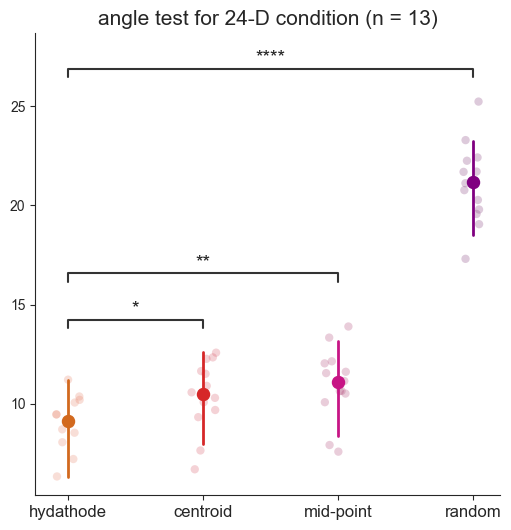

In [52]:
plot_test(angle_results_24D, angle_mean_df_24D, condition = treatments[0], test = 'angle')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:0.000e+00
hydathode v.s. mid-point: Custom statistical test, P_val:0.000e+00
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


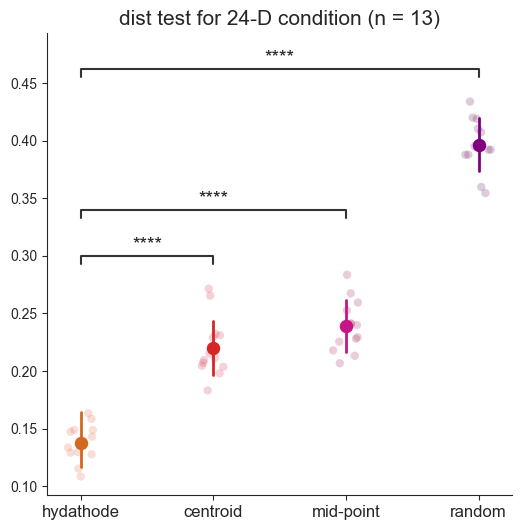

In [53]:
plot_test(dist_results_24D, dist_mean_df_24D, treatments[0], test = 'dist')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:2.097e-01
hydathode v.s. mid-point: Custom statistical test, P_val:6.000e-04
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


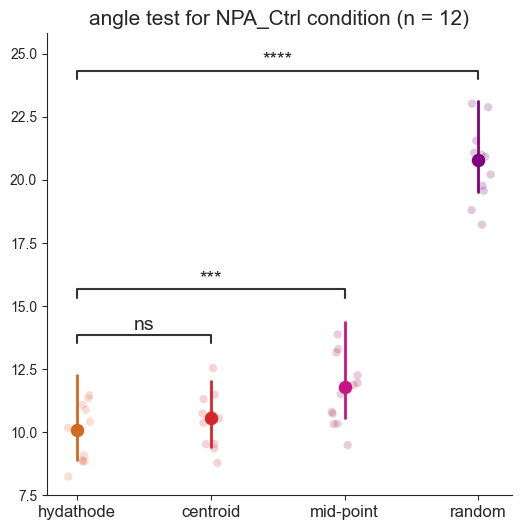

In [63]:
plot_test(angle_results_NPA_Ctrl, angle_mean_df_NPA_Ctrl, condition = treatments[5], test = 'angle')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:0.000e+00
hydathode v.s. mid-point: Custom statistical test, P_val:0.000e+00
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


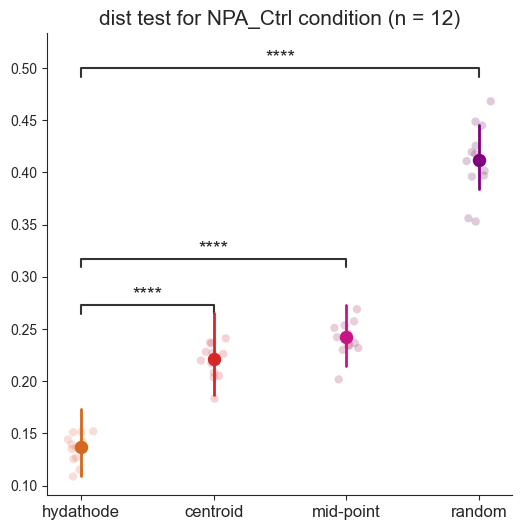

In [64]:
plot_test(dist_results_NPA_Ctrl, dist_mean_df_NPA_Ctrl, condition = treatments[5], test = 'dist')

### 1.2 Composite and compare between treatment

In [42]:
angle_24D = angle_mean_df_24D.iloc[:angle_mean_df_24D.shape[0]//4][['error', 'plant']]
angle_24D_Ctrl = angle_mean_df_24D_Ctrl.iloc[:angle_mean_df_24D_Ctrl.shape[0]//4][['error', 'plant']]
angle_Auxin = angle_mean_df_Auxin.iloc[:angle_mean_df_Auxin.shape[0]//4][['error', 'plant']]
angle_NPA50 = angle_mean_df_NPA50.iloc[:angle_mean_df_NPA50.shape[0]//4][['error', 'plant']]
angle_NPA100 = angle_mean_df_NPA100.iloc[:angle_mean_df_NPA100.shape[0]//4][['error', 'plant']]
angle_NPA_Ctrl = angle_mean_df_NPA_Ctrl.iloc[:angle_mean_df_NPA_Ctrl.shape[0]//4][['error', 'plant']]

In [65]:
angle_24D['condition'] = '24D'
angle_24D_Ctrl['condition'] = '24D_Ctrl'
angle_Auxin['condition'] = 'Auxin'
angle_NPA50['condition'] = 'NPA50'
angle_NPA100['condition'] = 'NPA100'
angle_NPA_Ctrl['condition'] = 'NPA_Ctrl'

In [43]:
dist_24D = dist_mean_df_24D.iloc[:dist_mean_df_24D.shape[0]//4][['error', 'plant']]
dist_24D_Ctrl = dist_mean_df_24D_Ctrl.iloc[:dist_mean_df_24D_Ctrl.shape[0]//4][['error', 'plant']]
dist_Auxin = dist_mean_df_Auxin.iloc[:dist_mean_df_Auxin.shape[0]//4][['error', 'plant']]
dist_NPA50 = dist_mean_df_NPA50.iloc[:dist_mean_df_NPA50.shape[0]//4][['error', 'plant']]
dist_NPA100 = dist_mean_df_NPA100.iloc[:dist_mean_df_NPA100.shape[0]//4][['error', 'plant']]
dist_NPA_Ctrl = dist_mean_df_NPA_Ctrl.iloc[:dist_mean_df_NPA_Ctrl.shape[0]//4][['error', 'plant']]

In [66]:
dist_24D['condition'] = '24D'
dist_24D_Ctrl['condition'] = '24D_Ctrl'
dist_Auxin['condition'] = 'Auxin'
dist_NPA50['condition'] = 'NPA50'
dist_NPA100['condition'] = 'NPA100'
dist_NPA_Ctrl['condition'] = 'NPA_Ctrl'

In [67]:
auxin_all_dist = pd.concat([dist_24D_Ctrl, dist_24D, dist_Auxin])
auxin_all_angle = pd.concat([ angle_24D_Ctrl, angle_24D, angle_Auxin])

In [68]:
NPA_all_dist = pd.concat([dist_NPA_Ctrl, dist_NPA50, dist_NPA100])
NPA_all_angle = pd.concat([angle_NPA_Ctrl, angle_NPA50, angle_NPA100])

In [69]:
auxin_all_dist["condition"]  = pd.Categorical(auxin_all_dist["condition"].tolist(), categories = ['24D_Ctrl','24D','Auxin'], ordered=True)
NPA_all_dist["condition"]  = pd.Categorical(NPA_all_dist["condition"].tolist(), categories = ['NPA_Ctrl','NPA50','NPA100'], ordered=True)

In [70]:
auxin_all_angle["condition"]  = pd.Categorical(auxin_all_angle["condition"].tolist(), categories = ['24D_Ctrl','24D','Auxin'], ordered=True)
NPA_all_angle["condition"]  = pd.Categorical(NPA_all_angle["condition"].tolist(), categories = ['NPA_Ctrl','NPA50','NPA100'], ordered=True)

In [73]:
auxin_dist_model = bmb.Model("error ~ condition + (1|plant)", auxin_all_dist, dropna=True, categorical = "condition")
auxin_dist_results = auxin_dist_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 66 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.675, but should be close to 0.8. Try to increase the number of tuning steps.


In [74]:
NPA_dist_model = bmb.Model("error ~ condition + (1|plant)", NPA_all_dist, dropna=True, categorical = "condition")
NPA_dist_results = NPA_dist_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 58 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6947, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [75]:
auxin_angle_model = bmb.Model("error ~ condition + (1|plant)", auxin_all_angle, dropna=True, categorical = "condition")
auxin_angle_results = auxin_angle_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 45 seconds.


In [76]:
NPA_angle_model = bmb.Model("error ~ condition + (1|plant)", NPA_all_angle, dropna=True, categorical = "condition")
NPA_angle_results = NPA_angle_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 46 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NPA_Ctrl v.s. NPA50: Custom statistical test, P_val:9.620e-01
NPA_Ctrl v.s. NPA100: Custom statistical test, P_val:8.137e-01


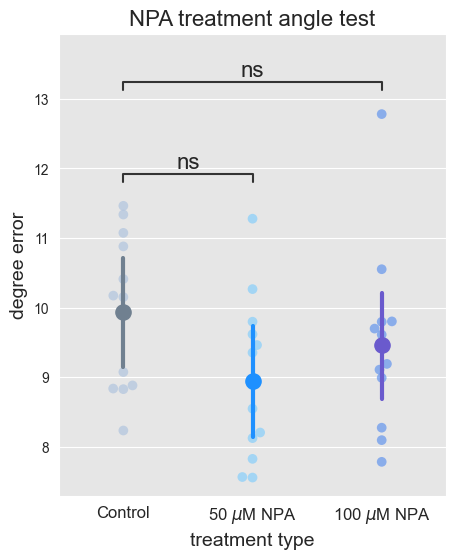

In [82]:
color_dots = ['lightsteelblue', 'lightskyblue', 'cornflowerblue']
colors = [ 'slategrey',  'dodgerblue', 'slateblue']

order = ['NPA_Ctrl' , 'NPA50','NPA100']

x = "condition"
y = "error"
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


slopes = NPA_angle_results.posterior.condition.values
intercept = NPA_angle_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))
# whether use smaller or larger depend on the type of test!
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000]
pairs = [( 'NPA50', 'NPA_Ctrl'), ('NPA100', 'NPA_Ctrl')]


y_mean = [az.summary(NPA_angle_results)['mean']['Intercept'],
        az.summary(NPA_angle_results)['mean']['Intercept'] + az.summary(NPA_angle_results)['mean']['condition[NPA50]'],
        az.summary(NPA_angle_results)['mean']['Intercept'] + az.summary(NPA_angle_results)['mean']['condition[NPA100]']]
        
fig, ax = plt.subplots(figsize = (5,6))

ax = sns.swarmplot(x = x, y = y, data = NPA_all_angle, order = order, 
                    size = 7, palette = color_dots, alpha = .7, zorder = 1)

ax, test_results = add_stat_annotation(ax, data = NPA_all_angle, x=x, y=y, order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 16)

x = list(range(3))
y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 97.5).tolist()


for i in range(3):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 3)
for i in range(3):
    ax.scatter(x[i], y_mean[i],  c = colors[i], s = 120, zorder = 2)

ax.set_title('NPA treatment angle test', fontsize = 16)

ax.set_ylabel('degree error', fontsize = 14)
ax.set_xlabel('treatment type', fontsize = 14)
ax.set_xticklabels(['Control','50 $\mu$M NPA', '100 $\mu$M NPA'], fontsize = 12)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NPA_Ctrl v.s. NPA50: Custom statistical test, P_val:2.758e-01
NPA_Ctrl v.s. NPA100: Custom statistical test, P_val:3.717e-01


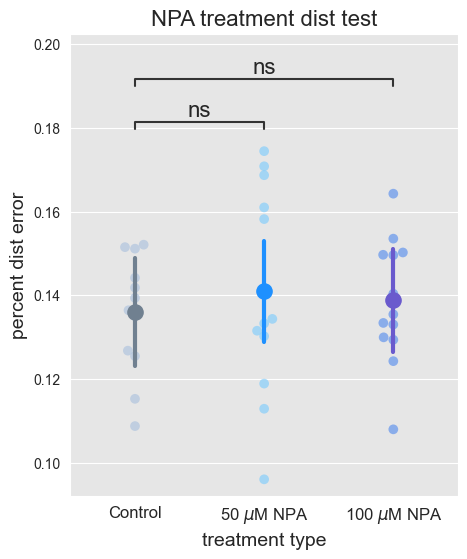

In [83]:
color_dots = ['lightsteelblue', 'lightskyblue', 'cornflowerblue']
colors = [ 'slategrey',  'dodgerblue', 'slateblue']

order = ['NPA_Ctrl' , 'NPA50','NPA100']

x = "condition"
y = "error"
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


slopes = NPA_dist_results.posterior.condition.values
intercept = NPA_dist_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))
# whether use smaller or larger depend on the type of test!
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000]
pairs = [( 'NPA50', 'NPA_Ctrl'), ('NPA100', 'NPA_Ctrl')]


y_mean = [az.summary(NPA_dist_results)['mean']['Intercept'],
        az.summary(NPA_dist_results)['mean']['Intercept'] + az.summary(NPA_dist_results)['mean']['condition[NPA50]'],
        az.summary(NPA_dist_results)['mean']['Intercept'] + az.summary(NPA_dist_results)['mean']['condition[NPA100]']]
        
fig, ax = plt.subplots(figsize = (5,6))

ax = sns.swarmplot(x = x, y = y, data = NPA_all_dist, order = order, 
                    size = 7, palette = color_dots, alpha = .7, zorder = 1)

ax, test_results = add_stat_annotation(ax, data = NPA_all_dist, x=x, y=y, order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 16)

x = list(range(3))
y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 97.5).tolist()


for i in range(3):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 3)
for i in range(3):
    ax.scatter(x[i], y_mean[i],  c = colors[i], s = 120, zorder = 2)

ax.set_title('NPA treatment dist test', fontsize = 16)

ax.set_ylabel('percent dist error', fontsize = 14)
ax.set_xlabel('treatment type', fontsize = 14)
ax.set_xticklabels(['Control','50 $\mu$M NPA', '100 $\mu$M NPA'], fontsize = 12)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

24D_Ctrl v.s. 24D: Custom statistical test, P_val:4.201e-01
24D_Ctrl v.s. Auxin: Custom statistical test, P_val:5.157e-01


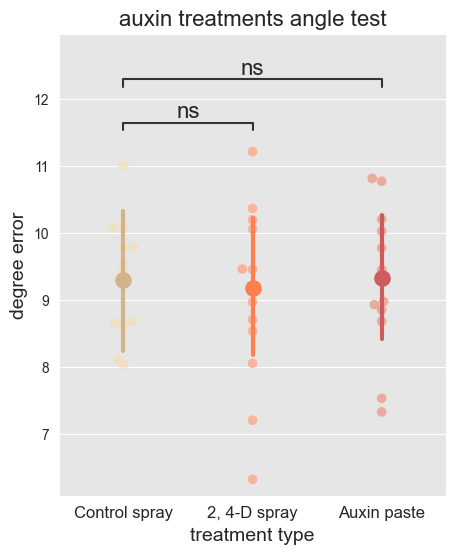

In [87]:
colors = ['tan',  'coral', 'indianred']
color_dots = ['wheat' , 'lightsalmon','darksalmon']
order = [  '24D_Ctrl','24D',  'Auxin',]
x = "condition"
y = "error"
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


slopes = auxin_angle_results.posterior.condition.values
intercept = auxin_angle_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))
# whether use smaller or larger depend on the type of test!
pvalues = [(slopes[:,:,0] >= 0).sum()/10000, (slopes[:,:,1] >= 0).sum()/10000]
pairs = [('24D','24D_Ctrl'), ('Auxin', '24D_Ctrl')]

y_mean = [az.summary(auxin_angle_results)['mean']['Intercept'],
        az.summary(auxin_angle_results)['mean']['Intercept'] + az.summary(auxin_angle_results)['mean']['condition[24D]'],
        az.summary(auxin_angle_results)['mean']['Intercept'] + az.summary(auxin_angle_results)['mean']['condition[Auxin]']]
        

fig, ax = plt.subplots(figsize = (5,6))

ax = sns.swarmplot(x = x, y = y, data = auxin_all_angle, order = order, size = 7,
                palette = color_dots, alpha = .7, zorder = 1)

ax, test_results = add_stat_annotation(ax, data = auxin_all_angle, x=x, y=y, order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 16)


x = list(range(3))
y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 97.5).tolist()


for i in range(3):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 3)
for i in range(3):
    ax.scatter(x[i], y_mean[i],  c = colors[i], s = 120, zorder = 2)

ax.set_title('auxin treatments angle test', fontsize = 16)

ax.set_ylabel('degree error', fontsize = 14)
ax.set_xlabel('treatment type', fontsize = 14)
ax.set_xticklabels(['Control spray','2, 4-D spray','Auxin paste'], fontsize = 12)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

24D_Ctrl v.s. 24D: Custom statistical test, P_val:1.115e-01
24D_Ctrl v.s. Auxin: Custom statistical test, P_val:8.315e-01


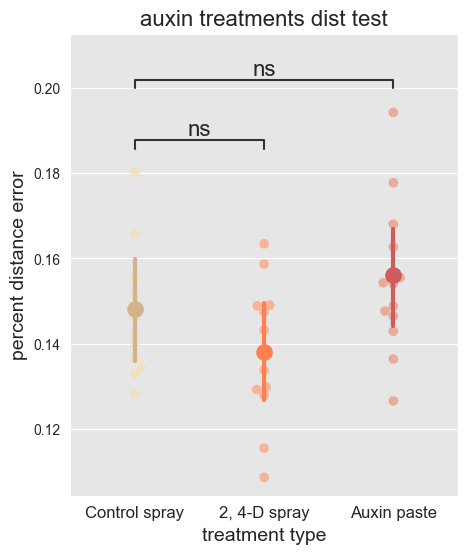

In [89]:
colors = ['tan',  'coral', 'indianred']
color_dots = ['wheat' , 'lightsalmon','darksalmon']
order = [  '24D_Ctrl','24D',  'Auxin',]
x = "condition"
y = "error"
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


slopes = auxin_dist_results.posterior.condition.values
intercept = auxin_dist_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))
# whether use smaller or larger depend on the type of test!
pvalues = [(slopes[:,:,0] >= 0).sum()/10000, (slopes[:,:,1] >= 0).sum()/10000]
pairs = [('24D','24D_Ctrl'), ('Auxin', '24D_Ctrl')]

y_mean = [az.summary(auxin_dist_results)['mean']['Intercept'],
        az.summary(auxin_dist_results)['mean']['Intercept'] + az.summary(auxin_dist_results)['mean']['condition[24D]'],
        az.summary(auxin_dist_results)['mean']['Intercept'] + az.summary(auxin_dist_results)['mean']['condition[Auxin]']]
        

fig, ax = plt.subplots(figsize = (5,6))

ax = sns.swarmplot(x = x, y = y, data = auxin_all_dist, order = order, size = 7,
                palette = color_dots, alpha = .7, zorder = 1)

ax, test_results = add_stat_annotation(ax, data = auxin_all_dist, x=x, y=y, order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 16)


x = list(range(3))
y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 97.5).tolist()


for i in range(3):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 3)
for i in range(3):
    ax.scatter(x[i], y_mean[i],  c = colors[i], s = 120, zorder = 2)

ax.set_title('auxin treatments dist test', fontsize = 16)

ax.set_ylabel('percent distance error', fontsize = 14)
ax.set_xlabel('treatment type', fontsize = 14)
ax.set_xticklabels(['Control spray','2, 4-D spray','Auxin paste'], fontsize = 12)


-------

## 2. Area test (Voronoi II):

In [4]:
def spatial_overlap(sample, dot_folder, vein_folder):
    print(f"it's sample {sample} we are talking about! \n")
    G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)

    seeds = [n for n in G.nodes if G.nodes[n]['type'] != 'vein']
    vor = Voronoi(seeds)
    bounded_regions = jaccard_similarity.bounded_polygons(G, vor)
    J_list = jaccard_similarity.overlap_test(G, seeds, bounded_regions)

    print(f'start area test for {sample}  \n')


    centroid_seeds, midpoint_seeds, random_seeds = jaccard_similarity.hybrid_seeds(G)

    centroid_vor = Voronoi(centroid_seeds)
    midpoint_vor =  Voronoi(midpoint_seeds)
    random_vor = Voronoi(random_seeds)

    centroid_bounded_regions = jaccard_similarity.bounded_polygons(G, centroid_vor)
    midpoint_bounded_regions = jaccard_similarity.bounded_polygons(G, midpoint_vor)
    random_bounded_regions = jaccard_similarity.bounded_polygons(G, random_vor)

    centroid_J_list = jaccard_similarity.overlap_test(G, seeds, centroid_bounded_regions)
    midpoint_J_list = jaccard_similarity.overlap_test(G, seeds, midpoint_bounded_regions)
    random_J_list = jaccard_similarity.overlap_test(G, seeds, random_bounded_regions)

    print(f'Finish area test. \n')

    return J_list.mean(), centroid_J_list.mean(), midpoint_J_list.mean(), random_J_list.mean()

    


In [5]:
def J_condition_test(treatment):
    
    dot_folder = f'../data/chemical/{treatment}/Hydathodes'
    vein_folder = f'../data/chemical/{treatment}/Veins'
    
    sample_df = pd.read_csv(f'../data/chemical/{treatment}.csv', delimiter=',', header = None, index_col= 0)
    sample_df.columns = ['plant']

    J_mean_arr = np.zeros([len(sample_df),4])


    for i, sample in enumerate(sample_df.index):
        J_mean_arr[i] = spatial_overlap(sample, dot_folder, vein_folder)


    J_mean_df , _ = shape_dfs(J_mean_arr, sample_df, value_name = 'overlap')
    
    return J_mean_df

        

In [15]:
J_24Dcontrol_df = J_condition_test(treatment= '24-D_Ctrl')
J_24D_df = J_condition_test(treatment= '24-D')
J_Auxin_df = J_condition_test(treatment= 'Auxin')
J_NPA_Ctrl_df = J_condition_test(treatment= 'NPA_Ctrl')
J_NPA50_df = J_condition_test(treatment= 'NPA_50')
J_NPA100_df = J_condition_test(treatment= 'NPA_100')


it's sample Ctrl_24-D_1A_1 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for Ctrl_24-D_1A_1  

Finish area test. 

it's sample Ctrl_24-D_1A_3 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for Ctrl_24-D_1A_3  

Finish area test. 

it's sample Ctrl_24-D_1B_1 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for Ctrl_24-D_1B_1  

Finish area test. 

it's sa

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/jaccard_similarity.py:300: RuntimeWarning: invalid value encountered in true_divide
  J_list = shared_area_list/union_area_list


start area test for Auxin_1B_1  

One multipolygon generated...
Finish area test. 

it's sample Auxin_1B_2 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for Auxin_1B_2  

Finish area test. 

it's sample Auxin_2A_2 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for Auxin_2A_2  

Finish area test. 

it's sample Auxin_3A_1 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

s

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/jaccard_similarity.py:300: RuntimeWarning: invalid value encountered in true_divide
  J_list = shared_area_list/union_area_list


start area test for NPA_1A_6  

One multipolygon generated...
Finish area test. 

it's sample NPA_1B_4 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for NPA_1B_4  

One multipolygon generated...
One multipolygon generated...
Finish area test. 

it's sample NPA_2A_4 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for NPA_2A_4  

Finish area test. 

it's sample NPA_1Bi_6 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: fin

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/jaccard_similarity.py:300: RuntimeWarning: invalid value encountered in true_divide
  J_list = shared_area_list/union_area_list


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for NPA_4A_3  

Finish area test. 

it's sample NPA_4Bi_2 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for NPA_4Bi_2  

Finish area test. 

it's sample NPA_3A_5 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for NPA_3A_5  

Finish area test. 

it's sample NPA_3B_4 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: mer

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/jaccard_similarity.py:300: RuntimeWarning: invalid value encountered in true_divide
  J_list = shared_area_list/union_area_list


Finish area test. 

it's sample Ctrl_NPA_4B_5 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for Ctrl_NPA_4B_5  

Finish area test. 

it's sample Ctrl_NPA_2A_3 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

One multipolygon generated...
start area test for Ctrl_NPA_2A_3  

One multipolygon generated...
One multipolygon generated...
Finish area test. 

it's sample Ctrl_NPA_2A_5 we are talking about! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testab

-----

### 3. Center prediction test (Voronoi III):

In [23]:
def size_M(sample, dot_folder, vein_folder):

    print(f'Predict center for {sample}  \n')

    G = graph_create.graph_creation(sample, dot_folder, vein_folder)

    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)
    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])
    s_list, b_list, g_list, g_nodes_index = center_predict.slope_intercept_gcc(G, G_dual, shared_edges_mat)

    print(f'Center prediction done. \n')

    return len(s_list), len(g_list)

In [24]:
def center_error_gcc(sample, dot_folder, vein_folder):

    print(f'Predict center for {sample}  \n')

    G = graph_create.graph_creation(sample, dot_folder, vein_folder)

    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)
    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])
    s_list, b_list, g_list, g_nodes_index = center_predict.slope_intercept_gcc(G, G_dual, shared_edges_mat)
    predicted_centers = center_predict.solve_lin_system_gcc(s_list, b_list, g_list)
    
    cent_list = [cent_in_faces[g_nodes_index[node]] for node in g_list]
    mid_list = [mid_in_faces[g_nodes_index[node]] for node in g_list ]
    rand_list = [rand_in_faces[g_nodes_index[node]] for node in g_list ]

    # errors:
    mean_dist = center_predict.mean_err(predicted_centers, g_list)
    cent_dist = center_predict.mean_err(predicted_centers, cent_list)
    mid_dist = center_predict.mean_err(predicted_centers, mid_list)
    rand_dist = center_predict.mean_err(predicted_centers, rand_list)

    print(f'Center prediction done. \n')

    return mean_dist, cent_dist, mid_dist, rand_dist

In [30]:
def prediction_gcc(treatment):
    dot_folder = f'../data/chemical/{treatment}/Hydathodes'
    vein_folder = f'../data/chemical/{treatment}/Veins'
    
    sample_df = pd.read_csv(f'../data/chemical/{treatment}.csv', delimiter=',', header = None, index_col= 0)
    sample_df.columns = ['plant']
    size_df = np.zeros([len(sample_df),2]) 


    for i, sample in enumerate(sample_df.index):       
        size_df[i] = size_M(sample, dot_folder, vein_folder)

    notpassed  = size_df[:, 0] <= size_df[:, 1]
    sample_df = sample_df.drop(index =  sample_df.index[np.where(notpassed)[0]])
    
    predict_err_arr = np.zeros([len(sample_df),4])
    
    for i, sample in enumerate(sample_df.index):
        predict_err_arr[i] = center_error_gcc(sample, dot_folder, vein_folder)

    predict_err_df, _ = shape_dfs(predict_err_arr, sample_df, value_name = 'error')

    return predict_err_df

In [31]:
pred_24Dcontrol_df = prediction_gcc(treatment= '24-D_Ctrl')
pred_24D_df = prediction_gcc(treatment= '24-D')
pred_Auxin_df = prediction_gcc(treatment= 'Auxin')
pred_NPA_Ctrl_df = prediction_gcc(treatment= 'NPA_Ctrl')
pred_NPA50_df = prediction_gcc(treatment= 'NPA_50')
pred_NPA100_df = prediction_gcc(treatment= 'NPA_100')

Predict center for Ctrl_24-D_1A_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_1A_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_1B_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_1A_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

-

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_1A_6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_1B_6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_2A_2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_2B_2  

Creating graph from vein and dot tracing images.

- Ste

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_1A_6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_1B_6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_2A_2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_24-D_2B_2  

Creating graph from vein and dot tracing images.

- Ste

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 24-D_1B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 24-D_1Bi_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 24-D_1Bii_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center f

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 24-D_1B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for 24-D_1Bi_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 24-D_1Bii_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 24-D_2A_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 24-D_1B_6  

Creating graph from vein and dot tracing images.

- Step1: reading files

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_NPA_2B_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])




Graph creation completed.

Center prediction done. 

Predict center for Ctrl_NPA_2B_5  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_NPA_1A_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_NPA_1B_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_NPA_1Ai_6  

Creating graph from vein and dot tracing images.

- Step

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Center prediction done. 

Predict center for Ctrl_NPA_2B_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for Ctrl_NPA_2B_5  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1A_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1A_2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_2B_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1A_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1A_6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- 

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_2B_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1A_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1A_6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_1B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- 

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_3A_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_3B_2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_4A_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_4A_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- 

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_3B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_4A_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_4A_5  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_4B_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_4B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_3A_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_3A_2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_3A_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_3B_2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_4A_1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_4A_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- 

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_3B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_4A_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Center prediction done. 

Predict center for NPA_4A_5  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for NPA_4B_3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...



/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for NPA_4B_4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

